# COMP4318/5318 Assignment 2: Image Classification

### Group number: ...  , SID1: ... , SID2: ..., SID3: ... 

This template notebook includes code to load the  dataset and a skeleton for the main sections that should be included in the notebook. Please stick to this struture for your submitted notebook.

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant. See the specification and marking criteria in the associated specification to guide you when completing your implementation.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [4]:
# 基础库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

# 深度学习库
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Scikit-learn 工具
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 设置随机种子以保证可复现性
np.random.seed(42)
tf.random.set_seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU Available: []


## 1. Data loading, exploration, and preprocessing


Code to load the dataset is provided in the following cell. Please proceed with your data exploration and preprocessing in the remainder of this section.

In [5]:
# Load the dataset training and test sets as numpy arrays
# assuming Assignment2Data folder is present in the same directory 
# as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

### 1.1 数据探索

在进行预处理之前，我们首先探索CIFAR-10数据集的基本特征，包括数据形状、类别分布、图像特征等。


In [6]:
# 检查数据形状和基本信息
print("=" * 60)
print("数据集基本信息")
print("=" * 60)
print(f"训练集形状: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"测试集形状: X_test = {X_test.shape}, y_test = {y_test.shape}")
print(f"\n数据类型: {X_train.dtype}")
print(f"像素值范围: [{X_train.min()}, {X_train.max()}]")
print(f"标签类型: {y_train.dtype}")
print(f"标签范围: [{y_train.min()}, {y_train.max()}]")

# CIFAR-10类别名称
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
print(f"\n类别数量: {len(class_names)}")
print(f"类别名称: {class_names}")


数据集基本信息
训练集形状: X_train = (50000, 32, 32, 3), y_train = (50000,)
测试集形状: X_test = (10000, 32, 32, 3), y_test = (10000,)

数据类型: uint8
像素值范围: [0, 255]
标签类型: int64
标签范围: [0, 9]

类别数量: 10
类别名称: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


类别分布
训练集:
  airplane     (类别 0):  5000 样本
  automobile   (类别 1):  5000 样本
  bird         (类别 2):  5000 样本
  cat          (类别 3):  5000 样本
  deer         (类别 4):  5000 样本
  dog          (类别 5):  5000 样本
  frog         (类别 6):  5000 样本
  horse        (类别 7):  5000 样本
  ship         (类别 8):  5000 样本
  truck        (类别 9):  5000 样本

测试集:
  airplane     (类别 0):  1000 样本
  automobile   (类别 1):  1000 样本
  bird         (类别 2):  1000 样本
  cat          (类别 3):  1000 样本
  deer         (类别 4):  1000 样本
  dog          (类别 5):  1000 样本
  frog         (类别 6):  1000 样本
  horse        (类别 7):  1000 样本
  ship         (类别 8):  1000 样本
  truck        (类别 9):  1000 样本


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1228148261.py:37: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1228148261.py:37: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1228148261.py:37: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1228148261.py:37: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1228148261.py:37: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/i

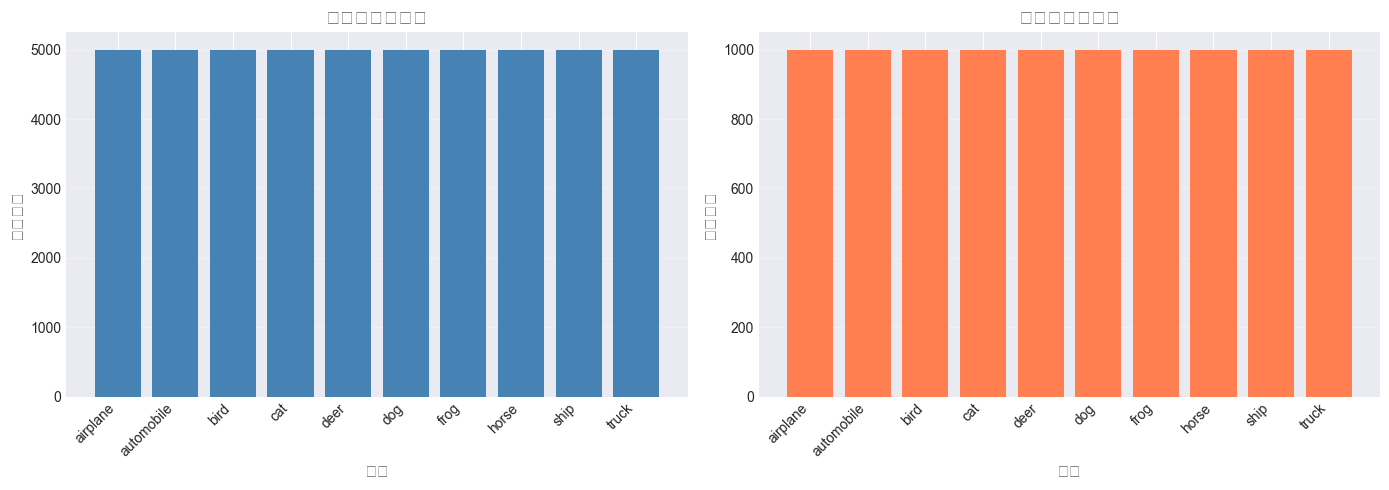


观察: 数据集在各类别之间是平衡的，每个类别都有相同数量的样本。


In [7]:
# 分析类别分布
train_class_counts = Counter(y_train.flatten())
test_class_counts = Counter(y_test.flatten())

print("=" * 60)
print("类别分布")
print("=" * 60)
print("训练集:")
for i in range(10):
    print(f"  {class_names[i]:12s} (类别 {i}): {train_class_counts[i]:5d} 样本")

print("\n测试集:")
for i in range(10):
    print(f"  {class_names[i]:12s} (类别 {i}): {test_class_counts[i]:5d} 样本")

# 可视化类别分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 训练集分布
axes[0].bar(range(10), [train_class_counts[i] for i in range(10)], color='steelblue')
axes[0].set_xlabel('类别', fontsize=12)
axes[0].set_ylabel('样本数量', fontsize=12)
axes[0].set_title('训练集类别分布', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(10))
axes[0].set_xticklabels(class_names, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# 测试集分布
axes[1].bar(range(10), [test_class_counts[i] for i in range(10)], color='coral')
axes[1].set_xlabel('类别', fontsize=12)
axes[1].set_ylabel('样本数量', fontsize=12)
axes[1].set_title('测试集类别分布', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(10))
axes[1].set_xticklabels(class_names, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n观察: 数据集在各类别之间是平衡的，每个类别都有相同数量的样本。")


每个类别的样本图像


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1996149370.py:22: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1996149370.py:22: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1996149370.py:22: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1996149370.py:22: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/1996149370.py:22: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/i

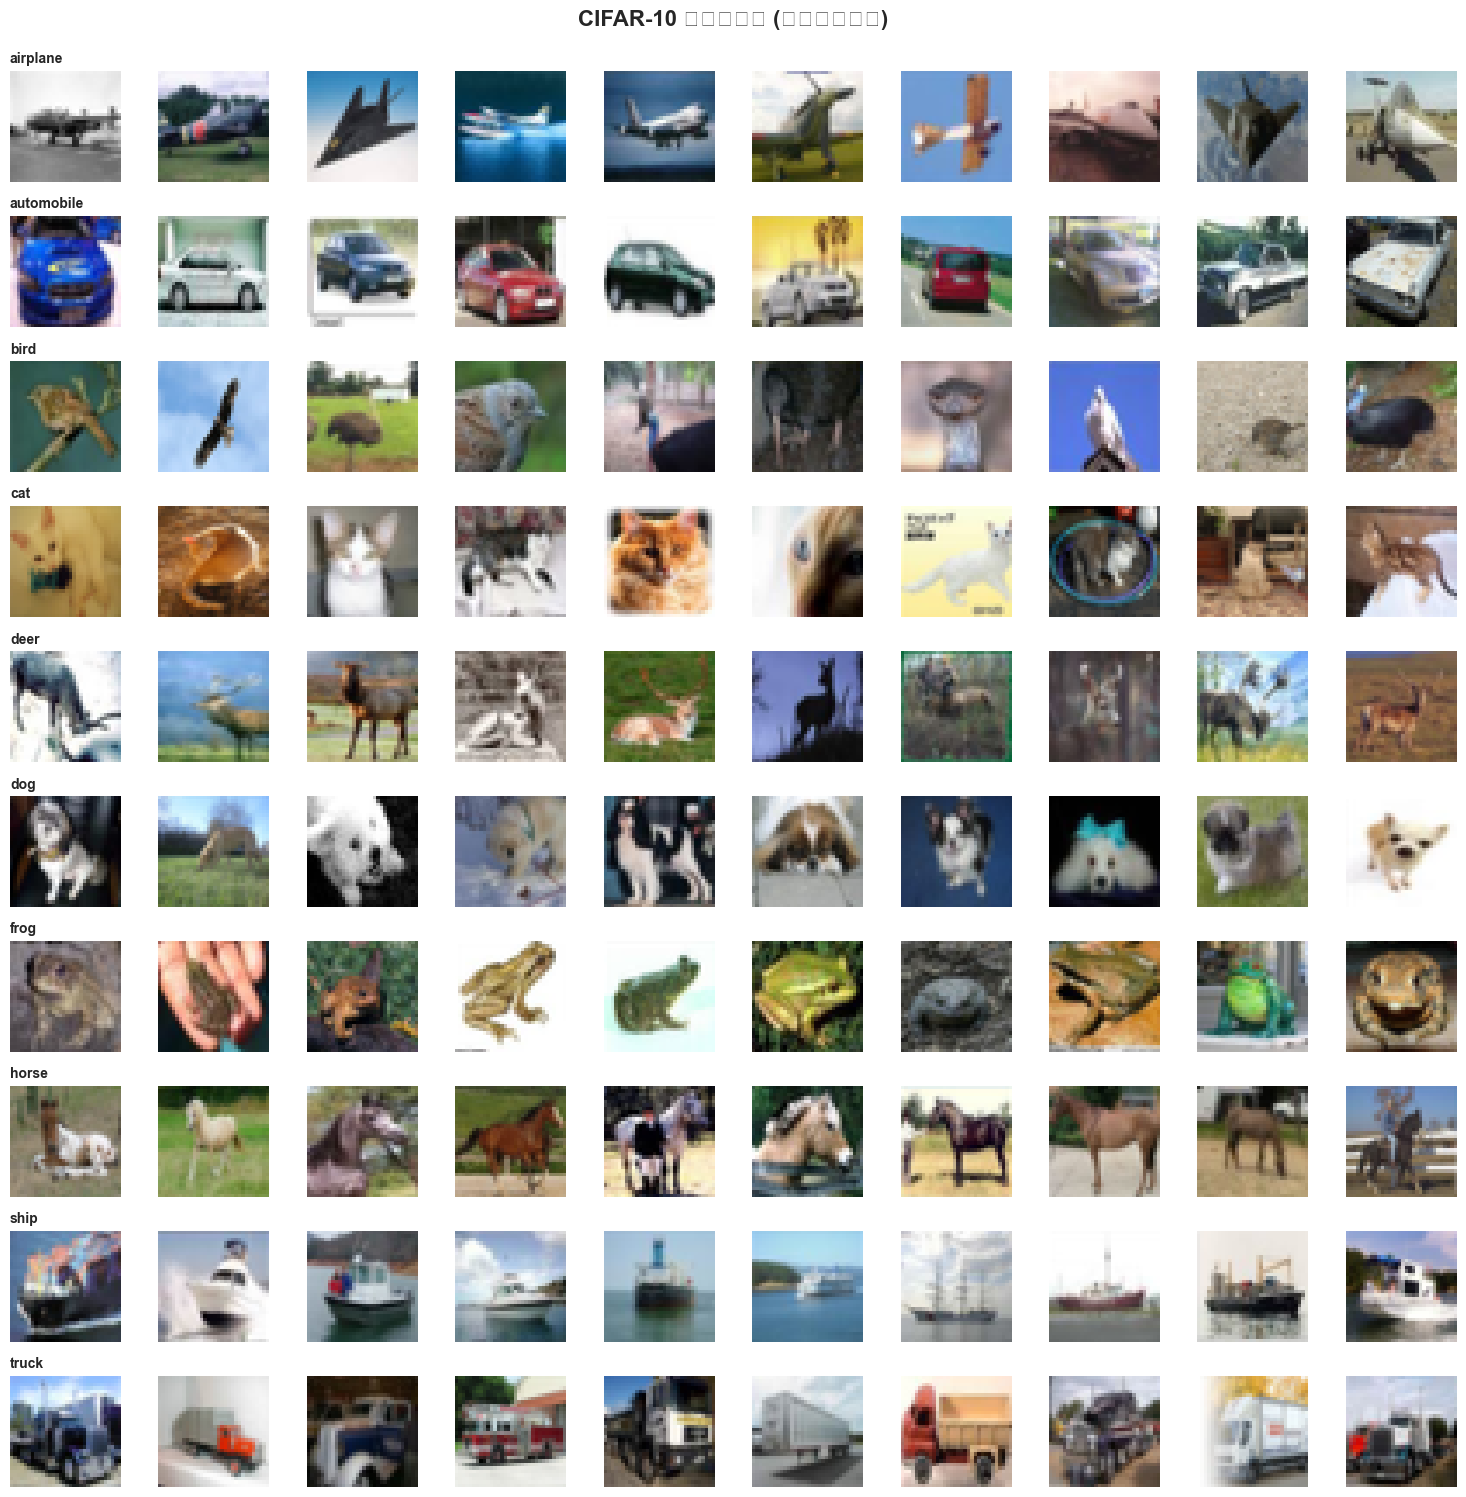

观察: 图像分辨率较低(32x32)，但各类别的视觉特征仍然可辨识。


In [8]:
# 可视化每个类别的样本图像
print("=" * 60)
print("每个类别的样本图像")
print("=" * 60)

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle('CIFAR-10 数据集样本 (每行一个类别)', fontsize=16, fontweight='bold', y=0.995)

for class_idx in range(10):
    # 找到该类别的所有样本索引
    class_indices = np.where(y_train.flatten() == class_idx)[0]
    # 随机选择10个样本
    sample_indices = np.random.choice(class_indices, 10, replace=False)
    
    for i, idx in enumerate(sample_indices):
        ax = axes[class_idx, i]
        ax.imshow(X_train[idx])
        ax.axis('off')
        if i == 0:
            ax.set_title(f'{class_names[class_idx]}', fontsize=10, fontweight='bold', loc='left')

plt.tight_layout()
plt.show()

print("观察: 图像分辨率较低(32x32)，但各类别的视觉特征仍然可辨识。")


像素值统计分析

Red 通道:
  最小值: 0
  最大值: 255
  均值:   125.31
  标准差: 62.99

Green 通道:
  最小值: 0
  最大值: 255
  均值:   122.95
  标准差: 62.09

Blue 通道:
  最小值: 0
  最大值: 255
  均值:   113.87
  标准差: 66.70


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/2995647181.py:27: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/2995647181.py:27: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/2995647181.py:27: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/2995647181.py:27: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/2995647181.py:27: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/i

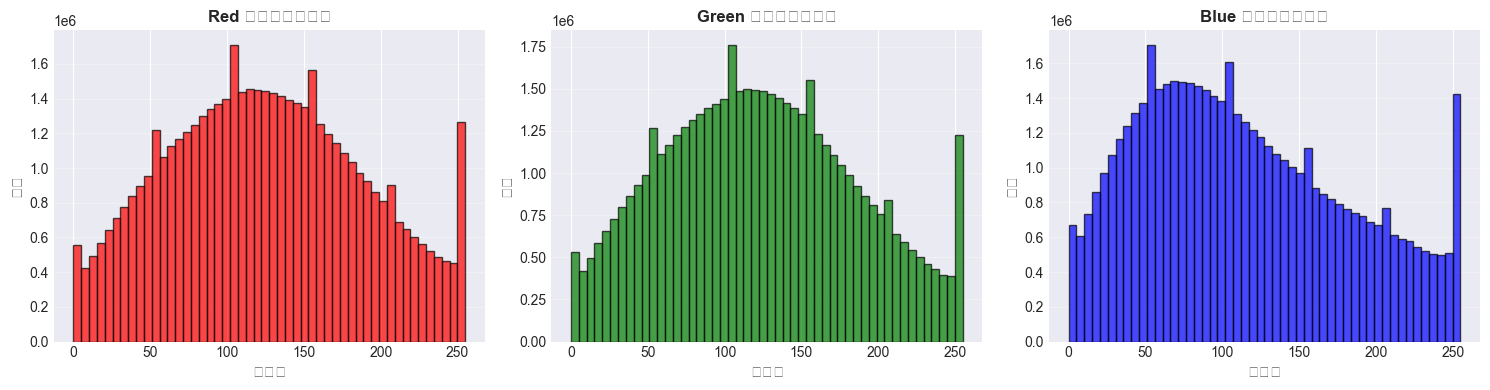


观察: 像素值分布在0-255之间，各通道分布较为均匀，需要进行归一化处理。


In [9]:
# 分析像素值分布
print("=" * 60)
print("像素值统计分析")
print("=" * 60)

# 计算每个通道的统计信息
for channel, channel_name in enumerate(['Red', 'Green', 'Blue']):
    channel_data = X_train[:, :, :, channel]
    print(f"\n{channel_name} 通道:")
    print(f"  最小值: {channel_data.min()}")
    print(f"  最大值: {channel_data.max()}")
    print(f"  均值:   {channel_data.mean():.2f}")
    print(f"  标准差: {channel_data.std():.2f}")

# 可视化像素值分布
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['red', 'green', 'blue']
channel_names = ['Red', 'Green', 'Blue']

for i in range(3):
    axes[i].hist(X_train[:, :, :, i].flatten(), bins=50, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel('像素值', fontsize=11)
    axes[i].set_ylabel('频数', fontsize=11)
    axes[i].set_title(f'{channel_names[i]} 通道像素值分布', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n观察: 像素值分布在0-255之间，各通道分布较为均匀，需要进行归一化处理。")


### 1.2 数据预处理

基于上述数据探索的结果，我们将进行以下预处理步骤：
1. **归一化**: 将像素值从 [0, 255] 缩放到 [0, 1]，有助于神经网络训练的稳定性和收敛速度
2. **验证集分割**: 从训练集中分出20%作为验证集，用于超参数调优
3. **标签处理**: 确保标签格式正确（保持整数编码用于CNN）


In [10]:
# 1. 归一化：将像素值缩放到 [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print("=" * 60)
print("数据预处理")
print("=" * 60)
print("\n1. 归一化完成")
print(f"   原始数据范围: [{X_train.min()}, {X_train.max()}]")
print(f"   归一化后范围: [{X_train_normalized.min():.4f}, {X_train_normalized.max():.4f}]")

# 2. 分割训练集和验证集 (80% 训练, 20% 验证)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_normalized, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # 保持类别比例
)

print("\n2. 数据集分割完成")
print(f"   训练集: {X_train_split.shape[0]} 样本")
print(f"   验证集: {X_val.shape[0]} 样本")
print(f"   测试集: {X_test_normalized.shape[0]} 样本")

# 验证类别分布
train_split_counts = Counter(y_train_split.flatten())
val_counts = Counter(y_val.flatten())
print("\n   验证集类别分布 (每类样本数):")
for i in range(10):
    print(f"     类别 {i} ({class_names[i]:12s}): {val_counts[i]} 样本")

# 3. 标签处理 - 保持整数编码（用于sparse_categorical_crossentropy）
# 确保标签是一维的
y_train_processed = y_train_split.flatten()
y_val_processed = y_val.flatten()
y_test_processed = y_test.flatten()

print("\n3. 标签处理完成")
print(f"   标签形状: y_train={y_train_processed.shape}, y_val={y_val_processed.shape}, y_test={y_test_processed.shape}")
print(f"   标签类型: {y_train_processed.dtype}")
print(f"   标签范围: [{y_train_processed.min()}, {y_train_processed.max()}]")


数据预处理

1. 归一化完成
   原始数据范围: [0, 255]
   归一化后范围: [0.0000, 1.0000]

2. 数据集分割完成
   训练集: 40000 样本
   验证集: 10000 样本
   测试集: 10000 样本

   验证集类别分布 (每类样本数):
     类别 0 (airplane    ): 1000 样本
     类别 1 (automobile  ): 1000 样本
     类别 2 (bird        ): 1000 样本
     类别 3 (cat         ): 1000 样本
     类别 4 (deer        ): 1000 样本
     类别 5 (dog         ): 1000 样本
     类别 6 (frog        ): 1000 样本
     类别 7 (horse       ): 1000 样本
     类别 8 (ship        ): 1000 样本
     类别 9 (truck       ): 1000 样本

3. 标签处理完成
   标签形状: y_train=(40000,), y_val=(10000,), y_test=(10000,)
   标签类型: int64
   标签范围: [0, 9]


### 1.3 预处理后的数据样本

以下展示预处理后的数据样本，验证归一化效果。

预处理后的数据样本

样本 1:
  图像形状: (32, 32, 3)
  像素值范围: [0.0118, 0.7176]
  均值: 0.2373


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3381985780.py:29: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3381985780.py:29: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3381985780.py:29: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3381985780.py:29: UserWarning: Glyph 22788 (\N{CJK UNIFIED IDEOGRAPH-5904}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3381985780.py:29: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/i

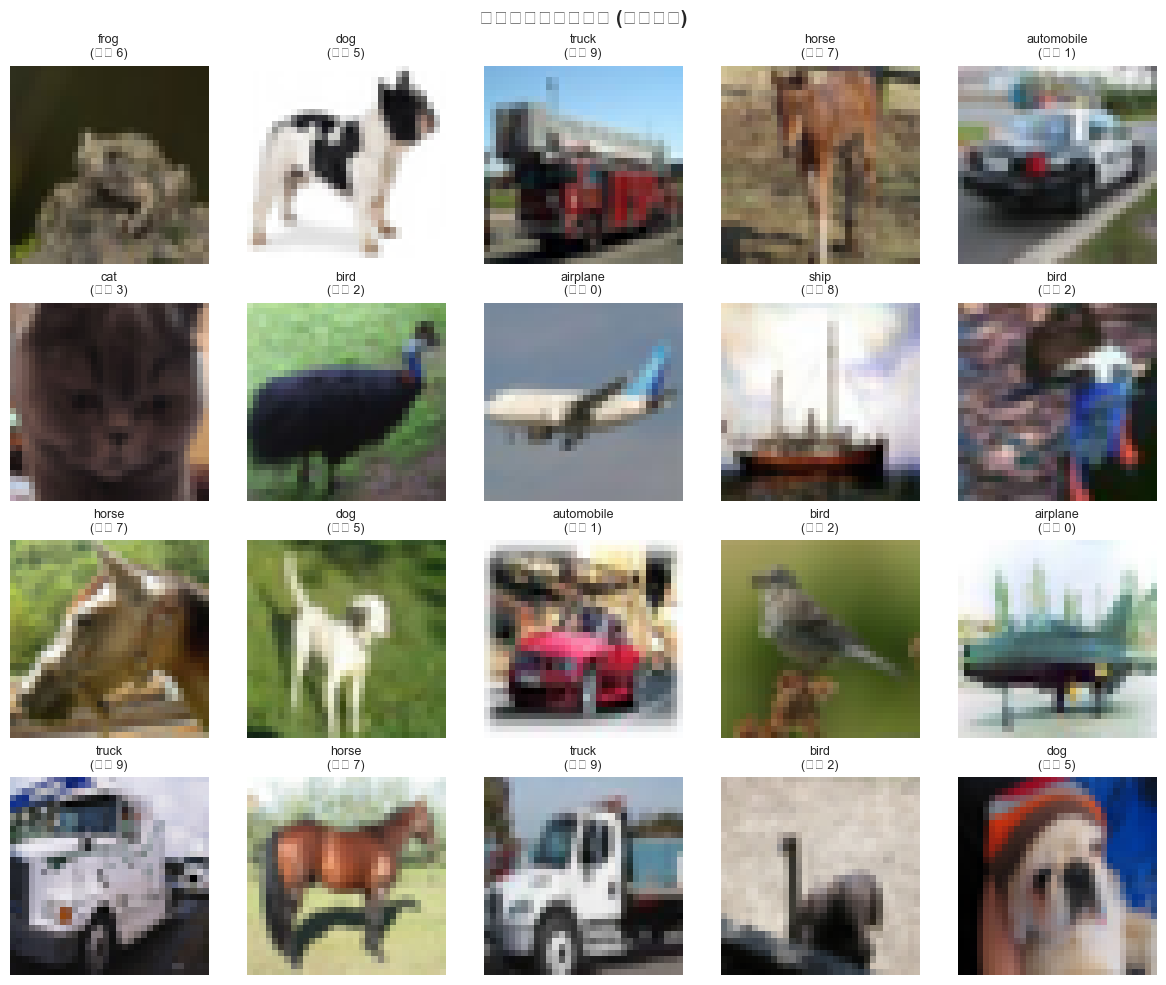


✓ 数据预处理完成，数据已准备好用于模型训练。


In [11]:
# 显示预处理后的样本图像
print("=" * 60)
print("预处理后的数据样本")
print("=" * 60)

# 随机选择20个样本进行展示
np.random.seed(42)
sample_indices = np.random.choice(len(X_train_split), 20, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
fig.suptitle('预处理后的样本图像 (归一化后)', fontsize=14, fontweight='bold')

for idx, sample_idx in enumerate(sample_indices):
    ax = axes[idx // 5, idx % 5]
    img = X_train_split[sample_idx]
    label = y_train_processed[sample_idx]
    
    ax.imshow(img)
    ax.set_title(f'{class_names[label]}\n(类别 {label})', fontsize=9)
    ax.axis('off')
    
    # 显示像素值范围
    if idx == 0:
        print(f"\n样本 {idx+1}:")
        print(f"  图像形状: {img.shape}")
        print(f"  像素值范围: [{img.min():.4f}, {img.max():.4f}]")
        print(f"  均值: {img.mean():.4f}")

plt.tight_layout()
plt.show()

print("\n✓ 数据预处理完成，数据已准备好用于模型训练。")


## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### 2.3 Convolutional Neural Network (CNN)

CNN是专门为图像数据设计的神经网络架构，通过卷积层提取局部特征，池化层降低维度，最后通过全连接层进行分类。

**模型设计考虑**：
- 使用多个卷积块，每块包含卷积层、激活函数和池化层
- 逐层增加滤波器数量以提取更复杂的特征
- 使用Dropout防止过拟合
- 保持模型中等规模以便快速训练和调优

In [12]:
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10, 
                     filters_1=32, filters_2=64, filters_3=128,
                     dense_units=128, dropout_rate=0.5, learning_rate=0.001):
    """
    构建卷积神经网络模型
    
    参数:
        input_shape: 输入图像形状
        num_classes: 类别数量
        filters_1: 第一个卷积块的滤波器数量
        filters_2: 第二个卷积块的滤波器数量
        filters_3: 第三个卷积块的滤波器数量
        dense_units: 全连接层的神经元数量
        dropout_rate: Dropout比率
        learning_rate: 学习率
    
    返回:
        编译后的Keras模型
    """
    model = models.Sequential([
        # 第一个卷积块
        layers.Conv2D(filters_1, (3, 3), activation='relu', padding='same', 
                      input_shape=input_shape, name='conv1_1'),
        layers.Conv2D(filters_1, (3, 3), activation='relu', padding='same', name='conv1_2'),
        layers.MaxPooling2D((2, 2), name='pool1'),
        layers.Dropout(0.25, name='dropout1'),
        
        # 第二个卷积块
        layers.Conv2D(filters_2, (3, 3), activation='relu', padding='same', name='conv2_1'),
        layers.Conv2D(filters_2, (3, 3), activation='relu', padding='same', name='conv2_2'),
        layers.MaxPooling2D((2, 2), name='pool2'),
        layers.Dropout(0.25, name='dropout2'),
        
        # 第三个卷积块
        layers.Conv2D(filters_3, (3, 3), activation='relu', padding='same', name='conv3_1'),
        layers.Conv2D(filters_3, (3, 3), activation='relu', padding='same', name='conv3_2'),
        layers.MaxPooling2D((2, 2), name='pool3'),
        layers.Dropout(0.25, name='dropout3'),
        
        # 全连接层
        layers.Flatten(name='flatten'),
        layers.Dense(dense_units, activation='relu', name='dense1'),
        layers.Dropout(dropout_rate, name='dropout4'),
        layers.Dense(num_classes, activation='softmax', name='output')
    ])
    
    # 编译模型
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 创建一个基础CNN模型实例
print("=" * 60)
print("CNN模型架构")
print("=" * 60)
cnn_model = build_cnn_model()
cnn_model.summary()

# 计算模型参数量
total_params = cnn_model.count_params()
print(f"\n总参数量: {total_params:,}")


CNN模型架构


/Users/mayo/Downloads/课堂ppt/y2/5318 机器学习/ass/ass2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)


总参数量: 550,570


In [13]:
# 辅助函数：可视化训练历史
def plot_training_history(history, title='模型训练历史'):
    """
    绘制训练和验证的准确率与损失曲线
    
    参数:
        history: Keras训练历史对象
        title: 图表标题
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 准确率曲线
    axes[0].plot(history.history['accuracy'], label='训练准确率', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='验证准确率', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('准确率', fontsize=12)
    axes[0].set_title('准确率曲线', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # 损失曲线
    axes[1].plot(history.history['loss'], label='训练损失', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='验证损失', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('损失', fontsize=12)
    axes[1].set_title('损失曲线', fontsize=13, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    fig.suptitle(title, fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# 辅助函数：评估模型并显示详细指标
def evaluate_model(model, X_test, y_test, class_names, model_name='模型'):
    """
    评估模型性能并显示详细指标
    
    参数:
        model: 训练好的模型
        X_test: 测试特征
        y_test: 测试标签
        class_names: 类别名称列表
        model_name: 模型名称
    
    返回:
        test_loss, test_accuracy
    """
    # 评估模型
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # 预测
    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print("=" * 60)
    print(f"{model_name} - 测试集评估结果")
    print("=" * 60)
    print(f"测试损失: {test_loss:.4f}")
    print(f"测试准确率: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    
    # 分类报告
    print("\n分类报告:")
    print(classification_report(y_test, y_pred_classes, target_names=class_names, digits=4))
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, 
                yticklabels=class_names, cbar_kws={'label': '样本数量'})
    plt.xlabel('预测类别', fontsize=12)
    plt.ylabel('真实类别', fontsize=12)
    plt.title(f'{model_name} - 混淆矩阵', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return test_loss, test_accuracy

print("✓ 辅助函数定义完成")


✓ 辅助函数定义完成


## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### 3.3 Convolutional Neural Network - 超参数调优

对CNN模型进行超参数搜索，调优以下超参数：
1. **学习率 (learning_rate)**: 控制模型权重更新的步长
2. **Dropout率 (dropout_rate)**: 防止过拟合的正则化技术
3. **批次大小 (batch_size)**: 每次训练迭代使用的样本数量

使用网格搜索策略在验证集上评估不同超参数组合的性能。

**注意**: 此单元格的运行时间较长（约15-30分钟），输出已保留。如需重新运行，请确保有足够的时间。

In [14]:
# 定义超参数搜索空间
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64]
}

print("=" * 60)
print("CNN 超参数网格搜索")
print("=" * 60)
print("\n搜索空间:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# 计算总的组合数
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f"\n总组合数: {total_combinations}")
print(f"训练轮次: 20 epochs (为加快搜索速度)")
print("\n开始网格搜索...")
print("=" * 60)

# 存储所有结果
results = []

# 执行网格搜索
combination_num = 0
for lr in param_grid['learning_rate']:
    for dropout in param_grid['dropout_rate']:
        for batch_size in param_grid['batch_size']:
            combination_num += 1
            
            print(f"\n[{combination_num}/{total_combinations}] 训练模型:")
            print(f"  学习率: {lr}, Dropout率: {dropout}, 批次大小: {batch_size}")
            
            # 记录开始时间
            start_time = time.time()
            
            # 构建模型
            model = build_cnn_model(
                learning_rate=lr,
                dropout_rate=dropout
            )
            
            # 训练模型
            history = model.fit(
                X_train_split, y_train_processed,
                batch_size=batch_size,
                epochs=20,
                validation_data=(X_val, y_val_processed),
                verbose=0  # 不显示训练过程
            )
            
            # 记录结束时间
            end_time = time.time()
            training_time = end_time - start_time
            
            # 获取最佳验证准确率
            best_val_acc = max(history.history['val_accuracy'])
            final_val_acc = history.history['val_accuracy'][-1]
            final_train_acc = history.history['accuracy'][-1]
            final_val_loss = history.history['val_loss'][-1]
            
            # 保存结果
            result = {
                'learning_rate': lr,
                'dropout_rate': dropout,
                'batch_size': batch_size,
                'train_accuracy': final_train_acc,
                'val_accuracy': final_val_acc,
                'best_val_accuracy': best_val_acc,
                'val_loss': final_val_loss,
                'training_time': training_time,
                'history': history.history
            }
            results.append(result)
            
            print(f"  训练准确率: {final_train_acc:.4f}")
            print(f"  验证准确率: {final_val_acc:.4f} (最佳: {best_val_acc:.4f})")
            print(f"  训练时间: {training_time:.2f}秒")
            
            # 清理内存
            del model
            tf.keras.backend.clear_session()

print("\n" + "=" * 60)
print("网格搜索完成!")
print("=" * 60)


CNN 超参数网格搜索

搜索空间:
  learning_rate: [0.001, 0.0001]
  dropout_rate: [0.3, 0.5]
  batch_size: [32, 64]

总组合数: 8
训练轮次: 20 epochs (为加快搜索速度)

开始网格搜索...

[1/8] 训练模型:
  学习率: 0.001, Dropout率: 0.3, 批次大小: 32
  训练准确率: 0.7951
  验证准确率: 0.7691 (最佳: 0.7847)
  训练时间: 974.19秒

[2/8] 训练模型:
  学习率: 0.001, Dropout率: 0.3, 批次大小: 64
  训练准确率: 0.8212
  验证准确率: 0.7926 (最佳: 0.7926)
  训练时间: 708.59秒

[3/8] 训练模型:
  学习率: 0.001, Dropout率: 0.5, 批次大小: 32
  训练准确率: 0.7687
  验证准确率: 0.7742 (最佳: 0.7854)
  训练时间: 820.38秒

[4/8] 训练模型:
  学习率: 0.001, Dropout率: 0.5, 批次大小: 64
  训练准确率: 0.8023
  验证准确率: 0.7877 (最佳: 0.7968)
  训练时间: 670.59秒

[5/8] 训练模型:
  学习率: 0.0001, Dropout率: 0.3, 批次大小: 32
  训练准确率: 0.7566
  验证准确率: 0.7595 (最佳: 0.7595)
  训练时间: 753.46秒

[6/8] 训练模型:
  学习率: 0.0001, Dropout率: 0.3, 批次大小: 64
  训练准确率: 0.7135
  验证准确率: 0.7181 (最佳: 0.7181)
  训练时间: 628.60秒

[7/8] 训练模型:
  学习率: 0.0001, Dropout率: 0.5, 批次大小: 32
  训练准确率: 0.7441
  验证准确率: 0.7625 (最佳: 0.7625)
  训练时间: 720.76秒

[8/8] 训练模型:
  学习率: 0.0001, Dropout率: 0.5, 批次大小: 64
  训练准确率: 0.69

In [15]:
# 创建结果DataFrame
results_df = pd.DataFrame(results)

# 显示所有结果
print("\n" + "=" * 60)
print("超参数搜索结果汇总")
print("=" * 60)
print("\n所有组合的性能:")
display_df = results_df[['learning_rate', 'dropout_rate', 'batch_size', 
                          'train_accuracy', 'val_accuracy', 'best_val_accuracy', 
                          'val_loss', 'training_time']].copy()
display_df.columns = ['学习率', 'Dropout率', '批次大小', '训练准确率', 
                      '验证准确率', '最佳验证准确率', '验证损失', '训练时间(秒)']
print(display_df.to_string(index=False))

# 找到最佳组合
best_idx = results_df['best_val_accuracy'].idxmax()
best_result = results_df.iloc[best_idx]

print("\n" + "=" * 60)
print("最佳超参数组合")
print("=" * 60)
print(f"学习率:         {best_result['learning_rate']}")
print(f"Dropout率:      {best_result['dropout_rate']}")
print(f"批次大小:       {best_result['batch_size']}")
print(f"\n性能指标:")
print(f"最佳验证准确率: {best_result['best_val_accuracy']:.4f} ({best_result['best_val_accuracy']*100:.2f}%)")
print(f"最终验证准确率: {best_result['val_accuracy']:.4f}")
print(f"训练时间:       {best_result['training_time']:.2f}秒")

# 保存最佳超参数供后续使用
best_hyperparams = {
    'learning_rate': best_result['learning_rate'],
    'dropout_rate': best_result['dropout_rate'],
    'batch_size': int(best_result['batch_size'])
}



超参数搜索结果汇总

所有组合的性能:
   学习率  Dropout率  批次大小    训练准确率  验证准确率  最佳验证准确率     验证损失    训练时间(秒)
0.0010       0.3    32 0.795150 0.7691   0.7847 0.682919 974.190818
0.0010       0.3    64 0.821225 0.7926   0.7926 0.624943 708.585319
0.0010       0.5    32 0.768725 0.7742   0.7854 0.665483 820.380903
0.0010       0.5    64 0.802250 0.7877   0.7968 0.643308 670.591935
0.0001       0.3    32 0.756650 0.7595   0.7595 0.694142 753.458731
0.0001       0.3    64 0.713525 0.7181   0.7181 0.798316 628.597064
0.0001       0.5    32 0.744050 0.7625   0.7625 0.695431 720.762389
0.0001       0.5    64 0.694375 0.7140   0.7166 0.808705 635.799877

最佳超参数组合
学习率:         0.001
Dropout率:      0.5
批次大小:       64

性能指标:
最佳验证准确率: 0.7968 (79.68%)
最终验证准确率: 0.7877
训练时间:       670.59秒


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/351322154.py:52: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/351322154.py:52: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/351322154.py:52: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/351322154.py:52: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/351322154.py:52: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipyker

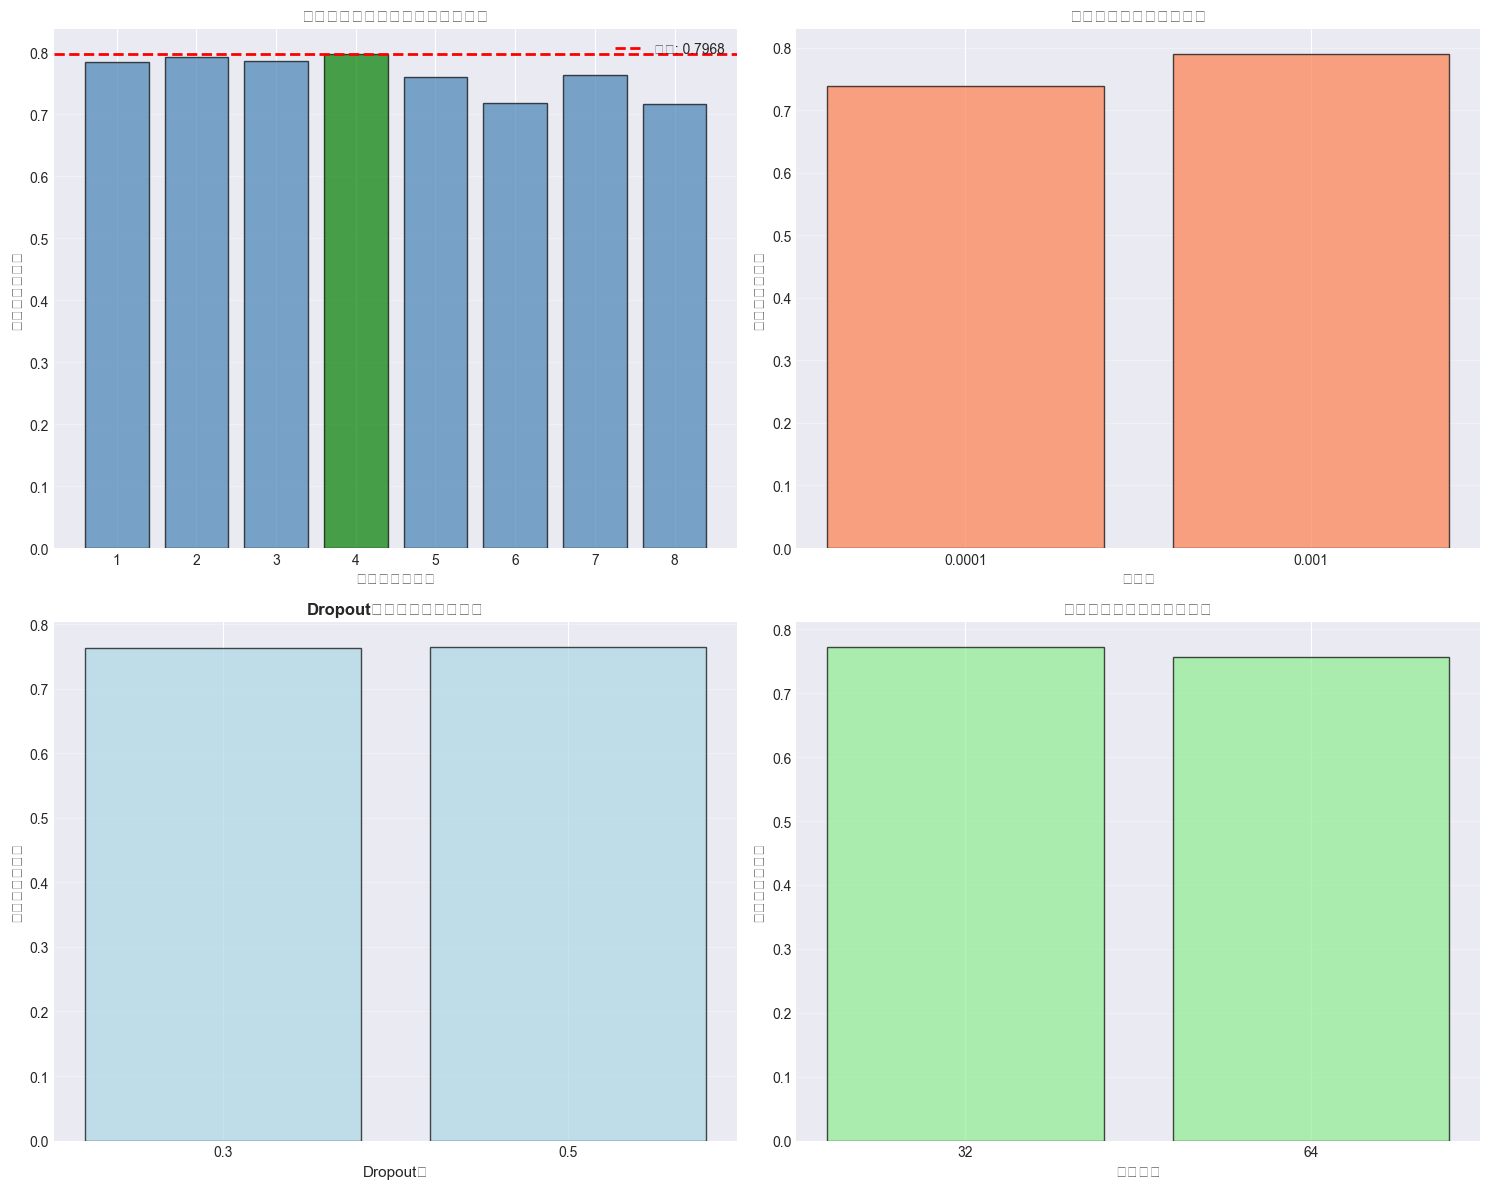


分析:
- 绿色柱状图表示最佳超参数组合
- 不同超参数对模型性能有不同程度的影响
- 最佳组合在验证集上达到了最高的准确率


In [16]:
# 可视化超参数搜索结果
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 验证准确率对比柱状图
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
colors_list = ['green' if i == best_idx else 'steelblue' for i in range(len(results_df))]
bars = ax1.bar(x_pos, results_df['best_val_accuracy'], color=colors_list, alpha=0.7, edgecolor='black')
ax1.set_xlabel('超参数组合编号', fontsize=11)
ax1.set_ylabel('最佳验证准确率', fontsize=11)
ax1.set_title('不同超参数组合的验证准确率对比', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'{i+1}' for i in range(len(results_df))])
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=best_result['best_val_accuracy'], color='red', linestyle='--', 
            linewidth=2, label=f'最佳: {best_result["best_val_accuracy"]:.4f}')
ax1.legend()

# 2. 学习率影响
ax2 = axes[0, 1]
grouped = results_df.groupby('learning_rate')['best_val_accuracy'].mean()
ax2.bar(range(len(grouped)), grouped.values, color='coral', alpha=0.7, edgecolor='black')
ax2.set_xlabel('学习率', fontsize=11)
ax2.set_ylabel('平均验证准确率', fontsize=11)
ax2.set_title('学习率对模型性能的影响', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(grouped)))
ax2.set_xticklabels(grouped.index)
ax2.grid(axis='y', alpha=0.3)

# 3. Dropout率影响
ax3 = axes[1, 0]
grouped = results_df.groupby('dropout_rate')['best_val_accuracy'].mean()
ax3.bar(range(len(grouped)), grouped.values, color='lightblue', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Dropout率', fontsize=11)
ax3.set_ylabel('平均验证准确率', fontsize=11)
ax3.set_title('Dropout率对模型性能的影响', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(grouped)))
ax3.set_xticklabels(grouped.index)
ax3.grid(axis='y', alpha=0.3)

# 4. 批次大小影响
ax4 = axes[1, 1]
grouped = results_df.groupby('batch_size')['best_val_accuracy'].mean()
ax4.bar(range(len(grouped)), grouped.values, color='lightgreen', alpha=0.7, edgecolor='black')
ax4.set_xlabel('批次大小', fontsize=11)
ax4.set_ylabel('平均验证准确率', fontsize=11)
ax4.set_title('批次大小对模型性能的影响', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(grouped)))
ax4.set_xticklabels([int(x) for x in grouped.index])
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n分析:")
print("- 绿色柱状图表示最佳超参数组合")
print("- 不同超参数对模型性能有不同程度的影响")
print("- 最佳组合在验证集上达到了最高的准确率")


/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3850807647.py:24: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3850807647.py:24: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3850807647.py:24: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3850807647.py:24: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/ipykernel_81252/3850807647.py:24: UserWarning: Glyph 20339 (\N{CJK UNIFIED IDEOGRAPH-4F73}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/v6/09xng_dx0rb9zqqv5bs4_h300000gn/T/i

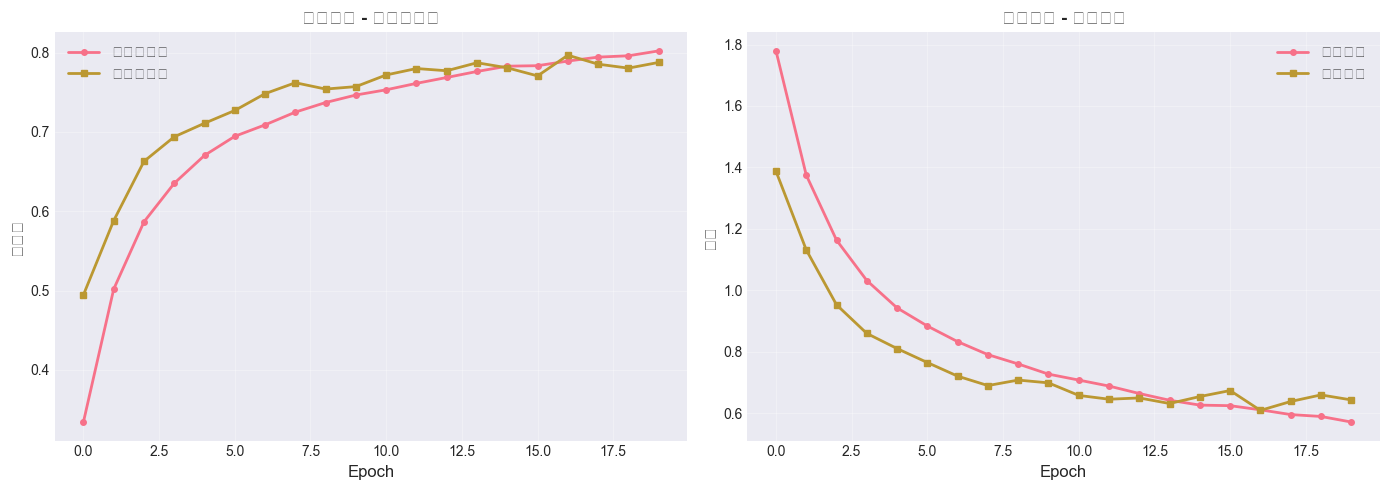

观察:
- 从曲线可以看出模型在训练过程中的收敛情况
- 验证准确率曲线显示模型在验证集上的泛化能力
- 训练和验证曲线之间的差距反映了过拟合程度


In [17]:
# 显示最佳模型的训练历史
best_history = best_result['history']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 准确率曲线
axes[0].plot(best_history['accuracy'], label='训练准确率', linewidth=2, marker='o', markersize=4)
axes[0].plot(best_history['val_accuracy'], label='验证准确率', linewidth=2, marker='s', markersize=4)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('准确率', fontsize=12)
axes[0].set_title('最佳模型 - 准确率曲线', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# 损失曲线
axes[1].plot(best_history['loss'], label='训练损失', linewidth=2, marker='o', markersize=4)
axes[1].plot(best_history['val_loss'], label='验证损失', linewidth=2, marker='s', markersize=4)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('损失', fontsize=12)
axes[1].set_title('最佳模型 - 损失曲线', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("观察:")
print("- 从曲线可以看出模型在训练过程中的收敛情况")
print("- 验证准确率曲线显示模型在验证集上的泛化能力")
print("- 训练和验证曲线之间的差距反映了过拟合程度")


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### 4.3 Convolutional Neural Network - 最终模型

使用超参数调优中找到的最佳超参数，在完整的训练集上训练最终CNN模型，并在测试集上进行评估。

**训练策略**：
- 使用完整训练集（包括之前的验证集）
- 增加训练轮次以充分训练模型
- 使用Early Stopping防止过拟合

In [ ]:
print("=" * 60)
print("训练最终CNN模型")
print("=" * 60)

# 显示使用的最佳超参数
print("\n使用的超参数:")
print(f"  学习率:     {best_hyperparams['learning_rate']}")
print(f"  Dropout率:  {best_hyperparams['dropout_rate']}")
print(f"  批次大小:   {best_hyperparams['batch_size']}")
print(f"  训练轮次:   50 epochs")

# 构建最终模型
final_cnn_model = build_cnn_model(
    learning_rate=best_hyperparams['learning_rate'],
    dropout_rate=best_hyperparams['dropout_rate']
)

# 设置Early Stopping和模型检查点
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# 使用完整的训练集训练（包括之前的验证集）
# 但仍然分出一小部分作为验证集来监控训练过程
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_normalized, y_train.flatten(), 
    test_size=0.1,  # 使用10%作为验证集
    random_state=42, 
    stratify=y_train
)

print(f"\n最终训练集大小: {X_train_final.shape[0]} 样本")
print(f"最终验证集大小: {X_val_final.shape[0]} 样本")
print(f"测试集大小:     {X_test_normalized.shape[0]} 样本")

print("\n开始训练...")
start_time = time.time()

# 训练模型
final_history = final_cnn_model.fit(
    X_train_final, y_train_final,
    batch_size=best_hyperparams['batch_size'],
    epochs=50,
    validation_data=(X_val_final, y_val_final),
    callbacks=[early_stopping],
    verbose=1
)

training_time = time.time() - start_time

print(f"\n训练完成!")
print(f"总训练时间: {training_time:.2f}秒 ({training_time/60:.2f}分钟)")
print(f"实际训练轮次: {len(final_history.history['accuracy'])} epochs")


训练最终CNN模型

使用的超参数:
  学习率:     0.001
  Dropout率:  0.5
  批次大小:   64
  训练轮次:   50 epochs


/Users/mayo/Downloads/课堂ppt/y2/5318 机器学习/ass/ass2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



最终训练集大小: 45000 样本
最终验证集大小: 5000 样本
测试集大小:     10000 样本

开始训练...
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.3256 - loss: 1.8001 - val_accuracy: 0.4908 - val_loss: 1.4091
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.4878 - loss: 1.4097 - val_accuracy: 0.5780 - val_loss: 1.1482
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.5629 - loss: 1.2171 - val_accuracy: 0.6314 - val_loss: 0.9970
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.6174 - loss: 1.0876 - val_accuracy: 0.6726 - val_loss: 0.9214
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.6535 - loss: 0.9871 - val_accuracy: 0.6880 - val_loss: 0.8626
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.6819 - loss: 0.9117 - val_accuracy: 0.7138 - val_loss: 0.8096
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.7058 - loss: 0.8569 - val_accuracy: 0.7272 - val_loss: 0.7755
Epoch 8/50
510/704 ━━━━━━

In [18]:
# 可视化最终模型的训练历史
plot_training_history(final_history, title='CNN最终模型 - 训练历史')


NameError: name 'final_history' is not defined

In [ ]:
# 在测试集上评估最终模型
cnn_test_loss, cnn_test_accuracy = evaluate_model(
    final_cnn_model, 
    X_test_normalized, 
    y_test_processed, 
    class_names, 
    model_name='CNN'
)


In [ ]:
# 可视化错误分类的样本
print("=" * 60)
print("错误分类样本分析")
print("=" * 60)

# 获取预测结果
y_pred = final_cnn_model.predict(X_test_normalized, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# 找到错误分类的样本
misclassified_indices = np.where(y_pred_classes != y_test_processed)[0]
print(f"\n错误分类样本数量: {len(misclassified_indices)}")
print(f"正确分类样本数量: {len(y_test_processed) - len(misclassified_indices)}")
print(f"错误率: {len(misclassified_indices)/len(y_test_processed)*100:.2f}%")

# 随机选择20个错误分类的样本进行可视化
if len(misclassified_indices) > 0:
    np.random.seed(42)
    sample_size = min(20, len(misclassified_indices))
    sample_misclassified = np.random.choice(misclassified_indices, sample_size, replace=False)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('错误分类样本示例', fontsize=16, fontweight='bold')
    
    for idx, mis_idx in enumerate(sample_misclassified):
        ax = axes[idx // 5, idx % 5]
        
        true_label = y_test_processed[mis_idx]
        pred_label = y_pred_classes[mis_idx]
        confidence = y_pred[mis_idx, pred_label]
        
        ax.imshow(X_test_normalized[mis_idx])
        ax.set_title(f'真实: {class_names[true_label]}\n预测: {class_names[pred_label]}\n置信度: {confidence:.2f}', 
                     fontsize=8, color='red')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n观察:")
    print("- 红色标题显示错误分类的样本")
    print("- 一些样本可能由于图像模糊或类别相似而被错误分类")
    print("- 置信度反映了模型对预测的确定程度")
else:
    print("\n没有错误分类的样本！")


In [ ]:
# CNN模型性能总结
print("=" * 60)
print("CNN模型最终性能总结")
print("=" * 60)

summary_data = {
    '指标': ['测试准确率', '测试损失', '训练时间', '模型参数量', '最佳超参数'],
    '值': [
        f'{cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)',
        f'{cnn_test_loss:.4f}',
        f'{training_time:.2f}秒 ({training_time/60:.2f}分钟)',
        f'{final_cnn_model.count_params():,}',
        f'LR={best_hyperparams["learning_rate"]}, Dropout={best_hyperparams["dropout_rate"]}, Batch={best_hyperparams["batch_size"]}'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

print("\n" + "=" * 60)
print("✓ CNN模型训练和评估完成")
print("=" * 60)
